In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:

df = pd.read_csv(r"D:\DataScience\Datascience Assignment\07 Multiple Linear Regression\ToyotaCorolla - MLR.csv")

In [3]:
df.head()
#1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

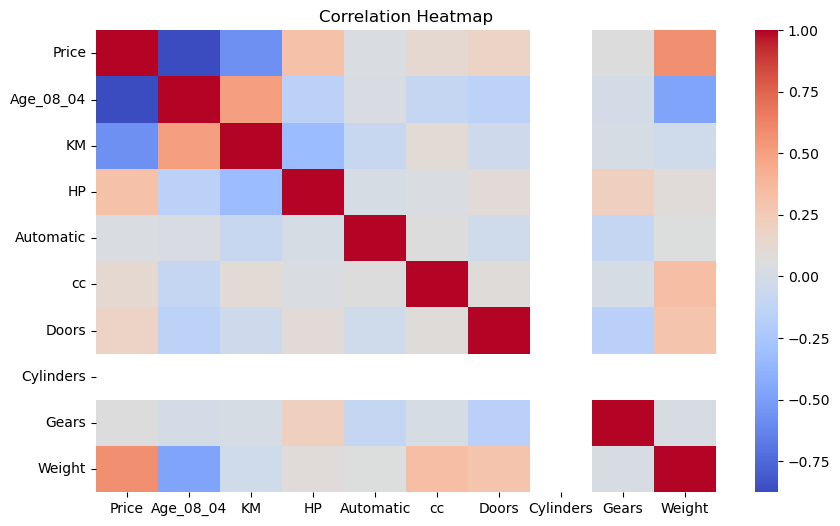

In [7]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    df.select_dtypes(include="number").corr(),
    annot=False,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
#df = pd.get_dummies(df, columns=["FuelType"], drop_first=True)

In [9]:
if "FuelType" in df.columns:df = pd.get_dummies(df, columns=["FuelType"], drop_first=True)

In [10]:

X = df.drop("Price", axis=1)
y = df["Price"]

In [11]:

X = X.select_dtypes(include="number")

In [12]:
# (Proof check) — this must show ONLY numbers
assert X.select_dtypes(exclude="number").shape[1] == 0, "X still has text!"

In [13]:
#2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [14]:
#  Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Train–test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
# model -1 : Multiple Linear Regression

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
y_pred_lr  = lr.predict(X_test)

In [19]:
#5.Apply Lasso and Ridge methods on the model.
# Model-2: Reduced Feature Model

In [20]:
important_features = ["KM", "HP", "Weight"]

In [21]:
X2 = df[important_features]
X2_scaled = scaler.fit_transform(X2)

In [22]:
X2_train, X2_test, y2_train, y2_test = train_test_split( X2_scaled, y, test_size=0.2, random_state=42)

In [23]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y2_pred = lr2.predict(X2_test)

In [25]:
print("R2 Score:", r2_score(y2_test, y2_pred))

R2 Score: 0.6087974174699559


In [26]:
# Model-3 : Lasso Regression

In [27]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [30]:
y_pred_lasso = lasso.predict(X_test)

In [29]:
print("R2 Score(Lasso):",r2_score(y_test,y_pred_lasso))

R2 Score(Lasso): 0.8523484666606703


In [2]:
#   Interview Questions:
# .What is Normalization & Standardization and how is it helpful?
"""
Normalization rescales data into a fixed range, usually 0 to 1. I typically use it when features are on very different scales and 
the algorithm is distance-based, like KNN or K-Means.

Standardization transforms data so it has a mean of 0 and a standard deviation of 1. 
It’s more suitable when the data contains outliers or when models like Linear or Logistic Regression rely on statistical assumptions.


Normalization controls the range of features, while standardization controls their distribution, 
and both improve model stability and learning efficiency.
"""

'\nNormalization rescales data into a fixed range, usually 0 to 1. I typically use it when features are on very different scales and \nthe algorithm is distance-based, like KNN or K-Means.\n\nStandardization transforms data so it has a mean of 0 and a standard deviation of 1. \nIt’s more suitable when the data contains outliers or when models like Linear or Logistic Regression rely on statistical assumptions.\n\n\nNormalization controls the range of features, while standardization controls their distribution, \nand both improve model stability and learning efficiency.\n'

In [3]:

# 2.What techniques can be used to address multicollinearity in multiple linear regression?
"""
Multicollinearity happens when two or more independent variables are highly related to each other,
which makes a multiple linear regression model unstable.

For example, while predicting house price, house size and number of rooms are strongly correlated
because bigger houses usually have more rooms. Using both gives almost the same information, 
so the model finds it hard to decide which feature actually impacts the price.

"""

'\nMulticollinearity happens when two or more independent variables are highly related to each other,\nwhich makes a multiple linear regression model unstable.\n\nFor example, while predicting house price, house size and number of rooms are strongly correlated\nbecause bigger houses usually have more rooms. Using both gives almost the same information, \nso the model finds it hard to decide which feature actually impacts the price.\n\n'